In [1]:
import pickle
import pandas as pd
import numpy as np
import xgboost
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from sklearn.model_selection import cross_val_predict
%matplotlib inline 

In [7]:
def read_pickle(path):
    objects = []
    with (open(path, "rb")) as openfile:
        while True:
            try:
                objects.append(pickle.load(openfile))
            except EOFError:
                break
    return objects

def get_features_targets(path_features,path_targets):
    features = read_pickle(path_features)
    targets = read_pickle(path_targets)
    return (features[0],targets[0])

def remove_nan_inf(array, change_value=0):
    if np.isnan(array).any():
        pos = np.isnan(array)
        array[pos] = change_value
    if np.isinf(array).any():
        pos = np.isinf(array)
        array[pos] = change_value
    return array

def check_nan_inf(array): 
    return (np.isnan(array).any() or np.isinf(array).any())
    
    
def skfold(X, y, model):
    skf = StratifiedKFold(n_splits=10)
    skf.get_n_splits(X, y)
    results = cross_val_score(model, X, y, cv=skf,scoring='f1',n_jobs = 2)
    return results

def print_acc(results,model):
    print("Accuracy of {} is {} and std is {}" .format(model ,results.mean()*100, results.std()*100))


        

### Scrapped Dataset

In [4]:

features_scrapped,targets_scrapped = get_features_targets\
('Datasets/generated_feature.pkl','Datasets/generated_feature_targets.pkl')
split = len(features_scrapped)*.2
X_s = features_scrapped[:int(split)]
y_s = targets_scrapped['target'][:int(split)]


In [5]:
len(X_s)

2232

In [6]:
targets_scrapped.head()

,id,Headline,target
0,0,"The Onion's Spoof Tweets Spark Anger, Fear; No...",0
1,1,“Here’s Why Current Situation is Even Worse Th...,1
2,2,What Is the World Coming to?,1
3,3,Canadian Homeowners Take Out HELOCs To Fund Su...,1
4,4,The Christmas Truce of World War I,1


In [7]:
check_nan_inf(X_s)


False

In [8]:
xgb_s = skfold(X_s, y_s, xgboost.XGBClassifier());
gnb_s = skfold(X_s, y_s, GaussianNB());
rf_s = skfold(X_s, y_s,RandomForestClassifier());
svc_s = skfold(X_s, y_s,SVC());
ada_s = skfold(X_s, y_s,AdaBoostClassifier());
knn_s = skfold(X_s, y_s,KNeighborsClassifier());
MLPc_s = skfold(X_s, y_s,MLPClassifier());
dic_s = {'XGB':xgb_s, 'RandomForest':rf_s,'SVC':svc_s,'GaussianNB':gnb_s,'adaBoost':ada_s,'KNN':knn_s, 'MLPc':MLPc_s}
dic_s


{'XGB': array([0.8436019 , 0.84577114, 0.84210526, 0.80612245, 0.86666667,
        0.86138614, 0.8440367 , 0.82587065, 0.85167464, 0.89952153]),
 'RandomForest': array([0.81      , 0.79591837, 0.7979798 , 0.77837838, 0.73513514,
        0.77720207, 0.7960199 , 0.75621891, 0.77083333, 0.81218274]),
 'SVC': array([0.43589744, 0.51162791, 0.4691358 , 0.51764706, 0.47727273,
        0.55555556, 0.50909091, 0.5497076 , 0.52325581, 0.46451613]),
 'GaussianNB': array([0.76363636, 0.7510917 , 0.71921182, 0.73891626, 0.71493213,
        0.81105991, 0.76712329, 0.75961538, 0.72115385, 0.78873239]),
 'adaBoost': array([0.82407407, 0.80952381, 0.79807692, 0.76923077, 0.85446009,
        0.83333333, 0.7826087 , 0.77832512, 0.83018868, 0.8       ]),
 'KNN': array([0.54644809, 0.57843137, 0.55789474, 0.58585859, 0.48730964,
        0.625     , 0.55555556, 0.63157895, 0.55497382, 0.57608696]),
 'MLPc': array([0.81385281, 0.78333333, 0.71910112, 0.54666667, 0.68646865,
        0.73913043, 0.75806452, 0

In [9]:
classifier = xgboost.XGBClassifier()
cv = StratifiedKFold(n_splits=10)
y_pred = cross_val_predict(classifier, X_s, y_s, cv = cv)

print(classification_report(y_s, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1180
           1       0.86      0.83      0.85      1052

   micro avg       0.86      0.86      0.86      2232
   macro avg       0.86      0.86      0.86      2232
weighted avg       0.86      0.86      0.86      2232



In [192]:
print_acc(xgb_s, 'XGBOOST')
print_acc(rf_s, 'Random Forest')
print_acc(svc_s, 'SVC ')
print_acc(gnb_s, 'gnb ')
print_acc(ada_s, 'adab ')
print_acc(knn_s, 'knn ')
print_acc(MLPc_s, 'mlp ')

print('\n\n\n')

results_s = pd.DataFrame(dic_s).applymap(lambda x: x*100)
results_s.to_csv('scrapped_kfold.csv')
results_s

#plt.savefig('visualization/SKF_scrapped.jpg',dpi=300,format='jpg')

Accuracy of XGBOOST is 84.86757073693897 and std is 2.347177638263607
Accuracy of Random Forest is 78.29868631799344 and std is 2.313590816105831
Accuracy of SVC  is 50.13706941410966 and std is 3.666872415813554
Accuracy of gnb  is 75.35473092848461 and std is 2.9678441819583847
Accuracy of adab  is 80.79821501185789 and std is 2.596957377082892
Accuracy of knn  is 56.991377087866994 and std is 3.89228455792128
Accuracy of mlp  is 73.11137428835893 and std is 6.981229097859118






,XGB,RandomForest,SVC,GaussianNB,adaBoost,KNN,MLPc
0,84.360190,81.000000,43.589744,76.363636,82.407407,54.644809,81.385281
1,84.577114,79.591837,51.162791,75.109170,80.952381,57.843137,78.333333
2,84.210526,79.797980,46.913580,71.921182,79.807692,55.789474,71.910112
3,80.612245,77.837838,51.764706,73.891626,76.923077,58.585859,54.666667
4,86.666667,73.513514,47.727273,71.493213,85.446009,48.730964,68.646865
5,86.138614,77.720207,55.555556,81.105991,83.333333,62.500000,73.913043
6,84.403670,79.601990,50.909091,76.712329,78.260870,55.555556,75.806452
7,82.587065,75.621891,54.970760,75.961538,77.832512,63.157895,74.157303
8,85.167464,77.083333,52.325581,72.115385,83.018868,55.497382,77.294686
9,89.952153,81.218274,46.451613,78.873239,80.000000,57.608696,75.000000


Text(0, 0.5, '%accuracy')

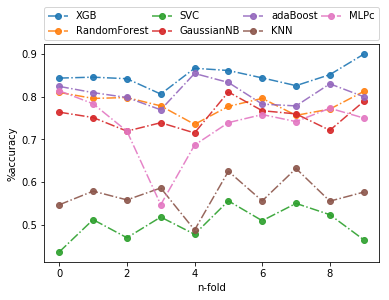

In [13]:
results_s.plot(**{'linewidth':1.5, 'linestyle':'-.','marker':'o',\
                     'alpha':.9})
plt.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left",
                mode="expand", borderaxespad=0, ncol=4)
plt.xlabel('n-fold')
plt.ylabel('%accuracy')

Text(0, 0.5, '%accuracy')

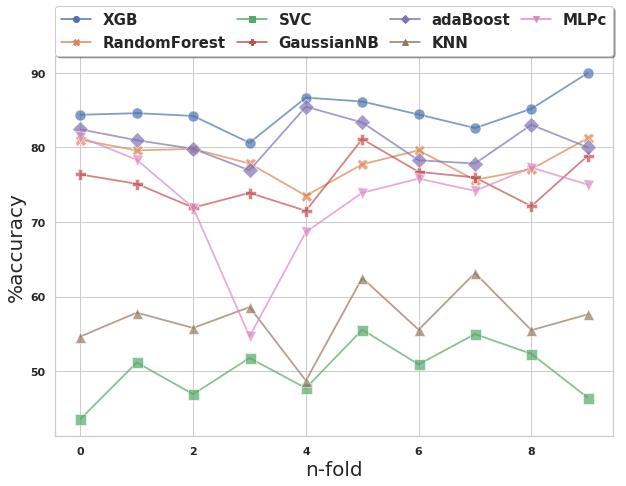

In [199]:

fig=plt.figure(figsize = (10,7))
sns.lineplot(data = results_s, style = 'event', markers=True, dashes = False,**{'linewidth':1.8, 'alpha':.7,'markersize' :11});
plt.legend(bbox_to_anchor=(0,1,1,0.2), loc="lower left",mode = 'expand', borderaxespad=0, ncol=4,fontsize = 15,shadow = True)
plt.xlabel('n-fold',fontsize = 20)
plt.ylabel('%accuracy',fontsize = 20)

In [200]:
fig.savefig('Dataset1.jpg',dpi = 1200)

### Kaggle Dataset

In [45]:

features_kaggle,targets_kaggle = get_features_targets\
('Datasets/generated_feature_kaggle.pkl','Datasets/targets_kaggle.pkl')

split = features_kaggle.shape[0]*.20
X_k = features_kaggle[:int(split)]
y_k = targets_kaggle['target'][:int(split)]

In [46]:
split

4160.0

In [47]:
check_nan_inf(X_k)

True

In [48]:
X_k =remove_nan_inf(X_k)
check_nan_inf(X_k)

False

In [49]:
xgb_k = skfold(X_k, y_k, xgboost.XGBClassifier())
gnb_k = skfold(X_k, y_k, GaussianNB())
rf_k = skfold(X_k, y_k,RandomForestClassifier())
svc_k = skfold(X_k, y_k,SVC())
ada_k = skfold(X_k, y_k,AdaBoostClassifier())
knn_k = skfold(X_k, y_k,KNeighborsClassifier())
MLPc_k = skfold(X_k, y_k,MLPClassifier())
dic_k = {'XGB':xgb_k, 'RandomForest':rf_k,'SVC':svc_k,'GaussianNB':gnb_k,'adaBoost':ada_k,'KNN':knn_k, 'MLPc':MLPc_k}
dic_k


{'XGB': array([0.91566265, 0.90322581, 0.91525424, 0.9352518 , 0.92601432,
        0.88461538, 0.87407407, 0.92009685, 0.90731707, 0.91525424]),
 'RandomForest': array([0.8478803 , 0.85063291, 0.88721805, 0.88625592, 0.86284289,
        0.855     , 0.84711779, 0.86407767, 0.8708134 , 0.90049751]),
 'SVC': array([0.47811448, 0.53333333, 0.44444444, 0.53376206, 0.5482866 ,
        0.50967742, 0.52317881, 0.54205607, 0.48184818, 0.48208469]),
 'GaussianNB': array([0.6884273 , 0.70724638, 0.7020649 , 0.69277108, 0.67655786,
        0.66871166, 0.69253731, 0.7251462 , 0.67477204, 0.7005988 ]),
 'adaBoost': array([0.88405797, 0.90024331, 0.89162562, 0.91169451, 0.90909091,
        0.85576923, 0.85853659, 0.9047619 , 0.90909091, 0.8973747 ]),
 'KNN': array([0.70769231, 0.69873418, 0.71087533, 0.68877551, 0.71428571,
        0.69825436, 0.71875   , 0.71356784, 0.68586387, 0.74185464]),
 'MLPc': array([0.91479821, 0.92307692, 0.8086785 , 0.93111639, 0.92307692,
        0.8046875 , 0.84210526, 0

In [59]:
classifier = xgboost.XGBClassifier()
cv = StratifiedKFold(n_splits=10)
y_pred = cross_val_predict(classifier, X_k, y_k, cv = cv)

print(classification_report(y_k, y_pred, target_names='reliable fake'.split()))

              precision    recall  f1-score   support

    reliable       0.89      0.93      0.91      2048
        fake       0.93      0.89      0.91      2112

   micro avg       0.91      0.91      0.91      4160
   macro avg       0.91      0.91      0.91      4160
weighted avg       0.91      0.91      0.91      4160



In [60]:
print_acc(xgb_k, 'XGBOOST')
print_acc(rf_k, 'Random Forest')
print_acc(svc_k, 'SVC ')
print_acc(gnb_k, 'gnb ')
print_acc(ada_k, 'adab ')
print_acc(knn_k, 'knn ')
print_acc(MLPc_k, 'mlp ')

print('\n\n\n')


results_k = pd.DataFrame(dic_k).applymap(lambda x: x*100)
results_k.to_csv('Dataset2_kfold.csv')
results_k

Accuracy of XGBOOST is 90.96766434160945 and std is 1.7522645001131192
Accuracy of Random Forest is 86.72336446651879 and std is 1.7647117608127292
Accuracy of SVC  is 50.76786095571882 and std is 3.2570598571233926
Accuracy of gnb  is 69.2883352868319 and std is 1.6092910383072547
Accuracy of adab  is 89.22245647269781 and std is 1.930533171879439
Accuracy of knn  is 70.78653755185064 and std is 1.5429882964127764
Accuracy of mlp  is 89.08718808545423 and std is 4.906260633978983






,XGB,RandomForest,SVC,GaussianNB,adaBoost,KNN,MLPc
0,91.566265,84.788030,47.811448,68.842730,88.405797,70.769231,91.479821
1,90.322581,85.063291,53.333333,70.724638,90.024331,69.873418,92.307692
2,91.525424,88.721805,44.444444,70.206490,89.162562,71.087533,80.867850
3,93.525180,88.625592,53.376206,69.277108,91.169451,68.877551,93.111639
4,92.601432,86.284289,54.828660,67.655786,90.909091,71.428571,92.307692
5,88.461538,85.500000,50.967742,66.871166,85.576923,69.825436,80.468750
6,87.407407,84.711779,52.317881,69.253731,85.853659,71.875000,84.210526
7,92.009685,86.407767,54.205607,72.514620,90.476190,71.356784,90.176322
8,90.731707,87.081340,48.184818,67.477204,90.909091,68.586387,92.235294
9,91.525424,90.049751,48.208469,70.059880,89.737470,74.185464,93.706294


Accuracy of XGBOOST is 91.05772967353643 and std is 1.6748431703415354
Accuracy of Random Forest is 86.63493181358527 and std is 1.8041229992198462
Accuracy of SVC  is 63.55679747212426 and std is 1.6539857959887458
Accuracy of gnb  is 75.24026946190962 and std is 1.0222003603748984
Accuracy of adab  is 89.25524635898326 and std is 1.8752012227964594
Accuracy of knn  is 72.54859143269259 and std is 1.4323894207125203
Accuracy of mlp  is 80.36786715206148 and std is 9.930680954259628






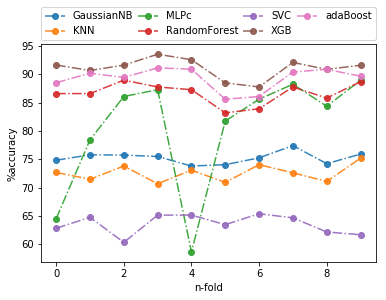

In [26]:

'''
results_k.plot(**{'linewidth':1.5, 'linestyle':'-.','marker':'o',\
                     'alpha':.9})
plt.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left",
                mode="expand", borderaxespad=0, ncol=4)
plt.xlabel('n-fold')
plt.ylabel('%accuracy')
#plt.savefig('visualization/SKF_kaggle.jpg',dpi=300,format='jpg')
''''

Text(0, 0.5, '%accuracy')

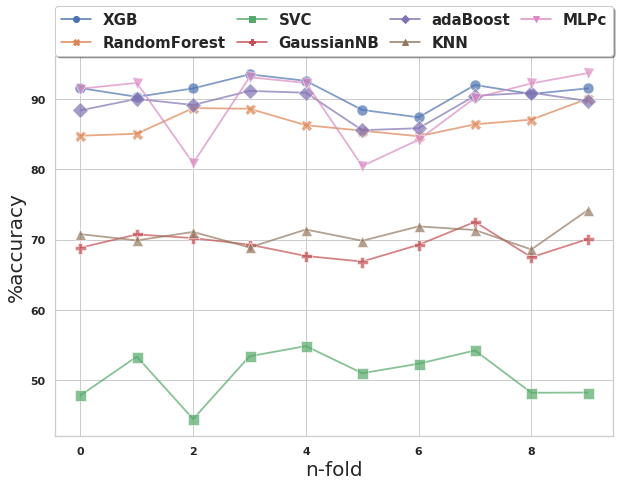

In [197]:

fig=plt.figure(figsize = (10,7))
sns.lineplot(data = results_k, style = 'event', markers=True, dashes = False,**{'linewidth':1.8, 'alpha':.7,'markersize' :11});
plt.legend(bbox_to_anchor=(0,1,1,0.2), loc="lower left",mode = 'expand', borderaxespad=0, ncol=4,fontsize = 15,shadow = True)
plt.xlabel('n-fold',fontsize = 20)
plt.ylabel('%accuracy',fontsize = 20)

In [198]:
fig.savefig('Dataset2.jpg',dpi = 1200)

### Third Dataset

In [63]:

features_third,targets_third = get_features_targets\
('Datasets/generated_feature_new.pkl','Datasets/targets_new.pkl')
split = features_third.shape[0]*.20
X_n = features_third[:int(split)]
y_n = targets_third['target'][:int(split)]


In [64]:
check_nan_inf(X_n)

True

In [65]:
X_n = remove_nan_inf(X_n)
check_nan_inf(X_n)

False

In [66]:
X_n.shape

(1267, 163)

In [67]:
xgb_n = skfold(X_n, y_n, xgboost.XGBClassifier());
gnb_n = skfold(X_n, y_n, GaussianNB());
rf_n = skfold(X_n, y_n,RandomForestClassifier());
svc_n = skfold(X_n, y_n,SVC());
ada_n = skfold(X_n, y_n,AdaBoostClassifier());
knn_n = skfold(X_n, y_n,KNeighborsClassifier());
MLPc_n = skfold(X_n, y_n,MLPClassifier());
dic_n = {'XGB':xgb_n, 'RandomForest':rf_n,'SVC':svc_n,'GaussianNB':gnb_n,'adaBoost':ada_n,'KNN':knn_n, 'MLPc':MLPc_n}
dic_n

{'XGB': array([0.87804878, 0.91338583, 0.87218045, 0.82926829, 0.85483871,
        0.84375   , 0.88188976, 0.89430894, 0.848     , 0.90322581]),
 'RandomForest': array([0.84552846, 0.77966102, 0.82706767, 0.8       , 0.78688525,
        0.765625  , 0.82926829, 0.83870968, 0.7107438 , 0.82352941]),
 'SVC': array([0.625     , 0.4       , 0.61818182, 0.4893617 , 0.4893617 ,
        0.51020408, 0.4494382 , 0.51612903, 0.37362637, 0.56603774]),
 'GaussianNB': array([0.72072072, 0.62745098, 0.72881356, 0.66019417, 0.62745098,
        0.67826087, 0.68518519, 0.75      , 0.68518519, 0.66      ]),
 'adaBoost': array([0.82258065, 0.8503937 , 0.88721805, 0.80991736, 0.82258065,
        0.78740157, 0.83464567, 0.85      , 0.82442748, 0.86440678]),
 'KNN': array([0.71544715, 0.55855856, 0.63492063, 0.55555556, 0.60344828,
        0.67768595, 0.58181818, 0.61946903, 0.56410256, 0.61261261]),
 'MLPc': array([0.81889764, 0.57777778, 0.69642857, 0.8       , 0.71698113,
        0.76106195, 0.67307692, 0

Accuracy of XGBOOST is 87.18896574068195 and std is 2.610441296868712
Accuracy of Random Forest is 80.07018570828157 and std is 3.9297911899825193
Accuracy of SVC  is 50.373406480504755 and std is 7.932899650616594
Accuracy of gnb  is 68.23261655519937 and std is 3.9062381789213063
Accuracy of adab  is 83.535718962662 and std is 2.714278303174118
Accuracy of knn  is 61.23618514863617 and std is 4.991629705211588
Accuracy of mlp  is 74.4977954461223 and std is 7.754874859576891






''

<Figure size 1800x1800 with 0 Axes>

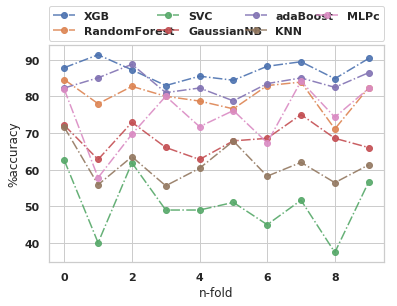

In [201]:
print_acc(xgb_n, 'XGBOOST')
print_acc(rf_n, 'Random Forest')
print_acc(svc_n, 'SVC ')
print_acc(gnb_n, 'gnb ')
print_acc(ada_n, 'adab ')
print_acc(knn_n, 'knn ')
print_acc(MLPc_n, 'mlp ')

print('\n\n\n')

results_n = pd.DataFrame(dic_n).applymap(lambda x: x*100)
results_n.to_csv('Dataset3_kfold.csv')

plt.figure(figsize=(25,25))
results_n.plot(**{'linewidth':1.5, 'linestyle':'-.','marker':'o',\
                     'alpha':.9,'figsize':(6,4)})

plt.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left",
                mode="expand", borderaxespad=0, ncol=4)
plt.xlabel('n-fold')
plt.ylabel('%accuracy')
;
#plt.savefig('visualization/SKF_third_d.jpg',dpi=300,format='jpg')

In [69]:
classifier = xgboost.XGBClassifier()
cv = StratifiedKFold(n_splits=10)
y_pred = cross_val_predict(classifier, X_n, y_n, cv = cv)

print(classification_report(y_n, y_pred, target_names='reliable fake'.split()))

              precision    recall  f1-score   support

    reliable       0.87      0.88      0.87       633
        fake       0.88      0.86      0.87       634

   micro avg       0.87      0.87      0.87      1267
   macro avg       0.87      0.87      0.87      1267
weighted avg       0.87      0.87      0.87      1267



In [12]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)

Text(0, 0.5, '%accuracy')

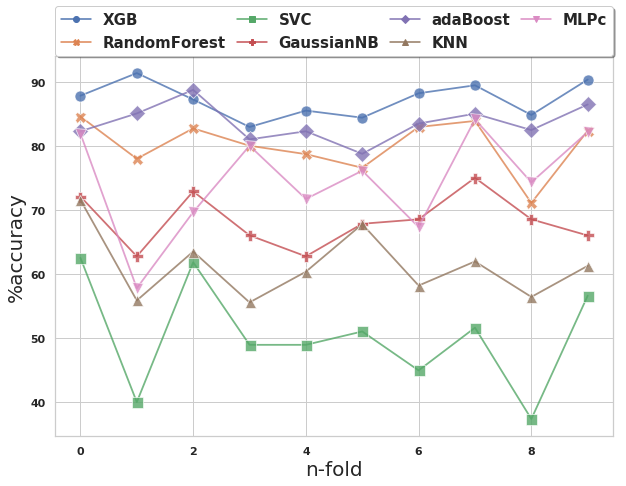

In [195]:

fig=plt.figure(figsize = (10,7))
sns.lineplot(data = results_n, style = 'event', markers=True, dashes = False,**{'linewidth':1.8, 'alpha':.8,'markersize' :11});
plt.legend(bbox_to_anchor=(0,1,1,0.2), loc="lower left",mode = 'expand', borderaxespad=0, ncol=4,fontsize = 15,shadow = True)
plt.xlabel('n-fold',fontsize = 20)
plt.ylabel('%accuracy', fontsize = 20)

In [196]:
fig.savefig('Dataset3.jpg',dpi = 1200)

In [ ]:
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), borderaxespad=0, ncol=1,title='ALGORITHM',title_fontsize = '14',shadow = True)

## Data Entry

In [3]:
np.mean([75.1,75.6,75.5,75.3,74.3,74.6,75.1,77.1,73.9,75.5])

75.19999999999999

## Dataset 1

In [6]:
xgb_s = [91.5,90.7,91.4,95.7,92.8,85.7,88.8,91.4,91.07,91.2]
rf_s  = [85.7,86.9,90.6,89.3,86.2,85,84.3,88.4,87.8,88.2]
svc_s = [62.8,65.3,61,65.6,65.5,64.2,65.7,65,61.6,61.2]
gnb_s = [75.1,75.6,75.5,75.3,74.3,74.6,75.1,77.1,73.9,75.5]
ada_s = [88.5,90.3,89.6,91,90.7,85.7,86,90.3,90.7,89.6]
knn_s = [73.1,71.5,74.1,70.5,73.5,71.2,74.3,72.8,71.4,75.4]
MLP_s = [85.7,92.5,81.1,84.8,91.8,86.8,91.7,86,89.6,92.5]
dic_s = {'XGB':xgb_s, 'RandomForest':rf_s,'SVC':svc_s,'GaussianNB':gnb_s,'adaBoost':ada_s,'KNN':knn_s, 'MLPc':MLP_s}

results_s = pd.DataFrame(dic_s)
#results_s.to_csv('Dataset1_kfold.csv')
results_s



,XGB,RandomForest,SVC,GaussianNB,adaBoost,KNN,MLPc
0,91.50,85.7,62.8,75.1,88.5,73.1,85.7
1,90.70,86.9,65.3,75.6,90.3,71.5,92.5
2,91.40,90.6,61.0,75.5,89.6,74.1,81.1
3,95.70,89.3,65.6,75.3,91.0,70.5,84.8
4,92.80,86.2,65.5,74.3,90.7,73.5,91.8
5,85.70,85.0,64.2,74.6,85.7,71.2,86.8
6,88.80,84.3,65.7,75.1,86.0,74.3,91.7
7,91.40,88.4,65.0,77.1,90.3,72.8,86.0
8,91.07,87.8,61.6,73.9,90.7,71.4,89.6
9,91.20,88.2,61.2,75.5,89.6,75.4,92.5


In [9]:
results_s.apply(np.mean)

XGB             91.027
RandomForest    87.240
SVC             63.790
GaussianNB      75.200
adaBoost        89.240
KNN             72.780
MLPc            88.250
dtype: float64

Text(0, 0.5, '%accuracy')

F:\TBINSTALLS\conda\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
F:\TBINSTALLS\conda\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
F:\TBINSTALLS\conda\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


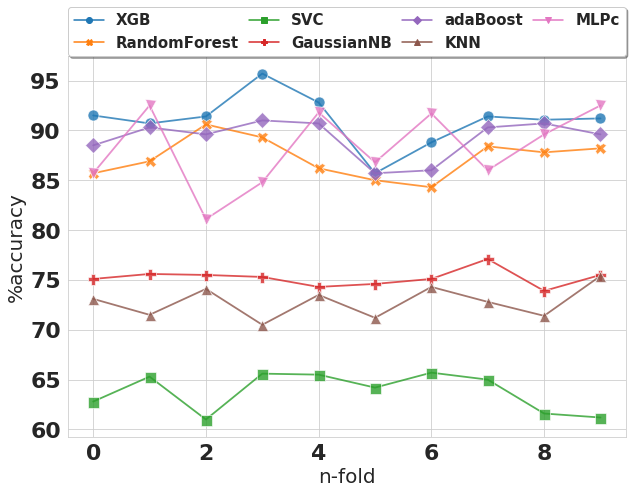

In [11]:

fig=plt.figure(figsize = (10,7))
sns.lineplot(data = results_s, style = 'event', markers=True, dashes = False,**{'linewidth':1.8, 'alpha':.8,'markersize' :11});
plt.legend(bbox_to_anchor=(0,1,1,0.2), loc="lower left",mode = 'expand', borderaxespad=0, ncol=4,fontsize = 15,shadow = True)
plt.xlabel('n-fold',fontsize = 20)
plt.ylabel('%accuracy', fontsize = 20)